In [1]:
import matplotlib as mpl
import numpy as np
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Number of participants
num_participants = 1  # Change this to your actual number of participants

# Dictionary to store dataframes
participant_dfs = {}

# Loop through each participant and read their data
for i in range(1, num_participants + 1):
    file_name = f'../data/p{i}/p{i}_main.csv'  # Adjust this format based on your file naming
    participant_dfs[f'p_{i}'] = pd.read_csv(file_name)
    participant_dfs[f'p_{i}']
    
for p_id, df in participant_dfs.items():
    df['error'] = df['curs_end_deg'] - df['target_deg']

# Now, participant_dfs['participant1'] is the dataframe for participant 1, and so on.


# df = pd.read_csv('../data/p1/p1_main.csv')
# p1['error'] = p1['curs_end_deg'] - p1['target_deg']
# p1.head()

# p2 = pd.read_csv('../data/p2/p2_main.csv')
# p2['error'] = p1['curs_end_deg'] - p1['target_deg']
# p2.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/p1/p1_main.csv'

In [43]:
for p_id, df in participant_dfs.items():
    mean_scores = df.groupby('vibration')['error'].mean()
    differences = mean_scores - mean_scores.loc[0]
    print(f"{p_id} -- Differences from Condition 0:")
    print(differences)
    differences.drop(0, inplace=True)

p_1 -- Differences from Condition 0:
vibration
0    0.000000
1   -0.715283
2    1.305711
3   -0.719702
Name: error, dtype: float64
p_2 -- Differences from Condition 0:
vibration
0    0.000000
1   -5.772280
2   -1.183571
3   -7.320919
Name: error, dtype: float64


C:\Users\gesch\AppData\Local\Temp\ipykernel_13564\2170554172.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(["None", "Dual", "Triceps", "Biceps"])
C:\Users\gesch\AppData\Local\Temp\ipykernel_13564\2170554172.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(["None", "Dual", "Triceps", "Biceps"])


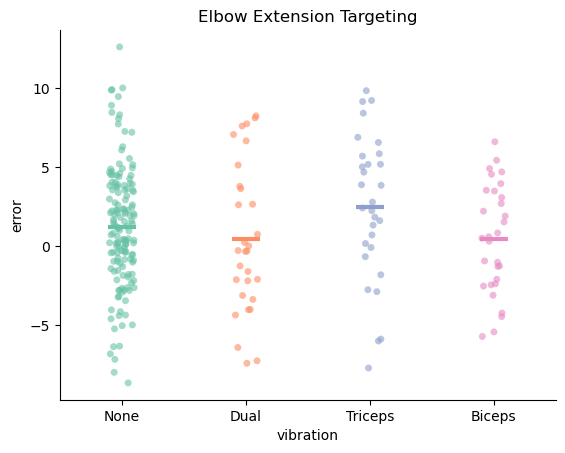

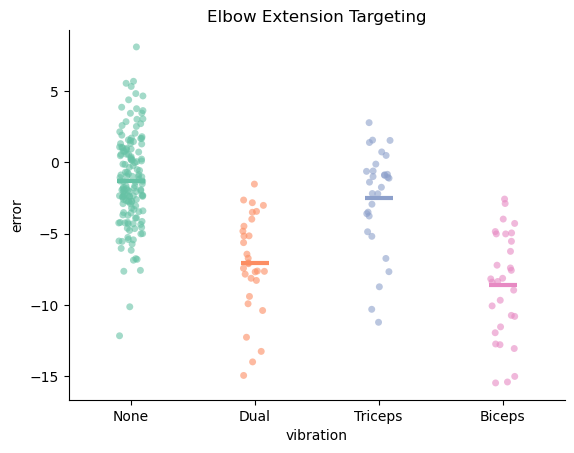

In [45]:
for p_id, df in participant_dfs.items():
    plt.figure()
    sns.stripplot(
        data=df, x="vibration", y="error", hue="vibration",
        dodge=False, alpha=.6, legend=False, palette="Set2"
    )
    fig = sns.pointplot(
        data=df, x="vibration", y="error", hue="vibration",
        dodge=0, linestyle="none", errorbar=None,
        marker="_", markersize=20, markeredgewidth=3, palette="Set2",
        legend=False
    )
    plt.title('Elbow Extension Targeting')
    fig.set_xticklabels(["None", "Dual", "Triceps", "Biceps"])
# plt.savefig("../results/p1/error-scores.png", dpi=1000)

plt.show()

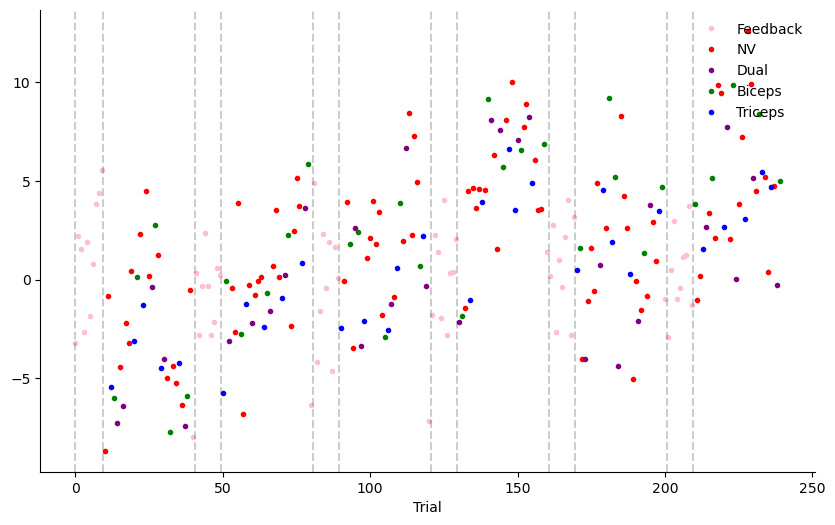

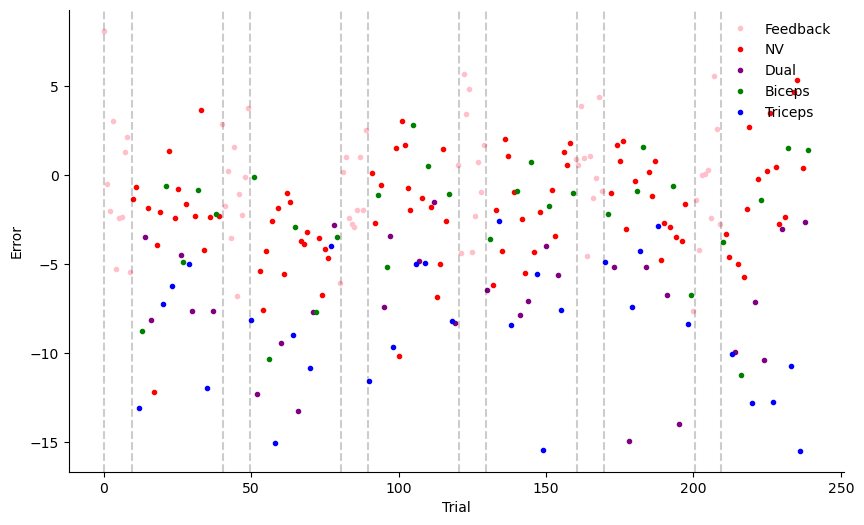

In [48]:
for p_id, df in participant_dfs.items():
    nv = df[(df["terminal_feedback"] == 0) & (df['vibration'] == 0)]
    biceps = df[(df["terminal_feedback"] == 0) & (df['vibration'] == 2)]
    triceps = df[(df["terminal_feedback"] == 0) & (df['vibration'] == 3)]
    dual = df[(df["terminal_feedback"] == 0) & (df['vibration'] == 1)]
    verdicial_data = df[df["terminal_feedback"] == 1]

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(verdicial_data['error'], '.', color="pink")
    ax.plot(nv['error'], '.', color='red')
    ax.plot(dual['error'], '.', color='purple')
    ax.plot(biceps['error'], '.', color='green')
    ax.plot(triceps['error'], '.', color='blue')
    lines = [0, 9.5, 40.5, 49.5, 80.5, 89.5, 120.5, 129.5, 160.5, 169.5, 200.5, 209.5]
    for line in lines:
        ax.axvline(line, linestyle='--', color='black', alpha=0.2)
    # ax.set_ylim([-15, 8])
    ax.legend(['Feedback','NV', 'Dual', 'Biceps', 'Triceps'], loc='upper right',  frameon=False)
    ax.set_xlabel("Trial")
ax.set_ylabel("Error")
# fig.show()
# fig.savefig("../results/p1/error-by-block.png", dpi=1000)
plt.show()